# Аналитика в авиакомпании


## Описание данных

Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

Таблица aircrafts — информация об самолётах:
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта


Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета
- flight_id — идентификатор рейса


Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

## Изучение общей информации

Импортируем данные, полученные на прошлых шагах при помощи запросов SQL. Сначала рассмотрим таблицу по количеству полетов на каждую модель самолетов.

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
sns.set(style="darkgrid")
sns.set_palette(sns.light_palette("navy", reverse=True))

model_data = pd.read_csv('/datasets/query_1.csv')
display(model_data.head(10))
display(model_data.info())
display(model_data.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Всего в таблице представленно данные о 8 моделях самолетов. Из низ 3 модели совершили более 4 тысяч рейсов, при это среди остальных максимальное значение - 960 полетов. Большой размах данных подтверждает и значительная разница между средней и медианой - 2035,6 и 795 полетов, и большое стандартное отклонение. Пропущенных значений нет, все данные находятся в таблице в нужных форматах.

Выгрузим таблицу со средним количеством рейсов в день в разрезе по городам.

In [2]:
city_data = pd.read_csv('/datasets/query_3.csv')
city_data['average_flights']=round(city_data['average_flights'],2)
display(city_data.head(10))
display(city_data.info())
display(city_data.describe())

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
5,Барнаул,2.61
6,Белгород,6.00
7,Белоярский,2.00
8,Благовещенск,1.00
9,Братск,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.493663
std,13.119346
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870000
max,129.770000


Всего в таблице представленно данные о 101 городах. Пропущенных значений нет, все данные находятся в таблице в нужных форматах, но было применение округление до 2 знаков. Как и в случае с моделями, размах между минимальным и максимальным значением достаточно большой, но так как данных гораздо больше, вариация меньше. В 50% городов совершается до 3 полетов в день. 

## Построение графиков

Рассмротрим график по количеству полетов на модель самолета. Самая используемая модель - Cessna 208 Caravan.Самая редколетающая - Boeing 777-300. Разрыв между популярными и остальными моделями визуально еще заметнее. Можно считать, что авиаперевозки в основном обеспечивают 3 модели - Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100.

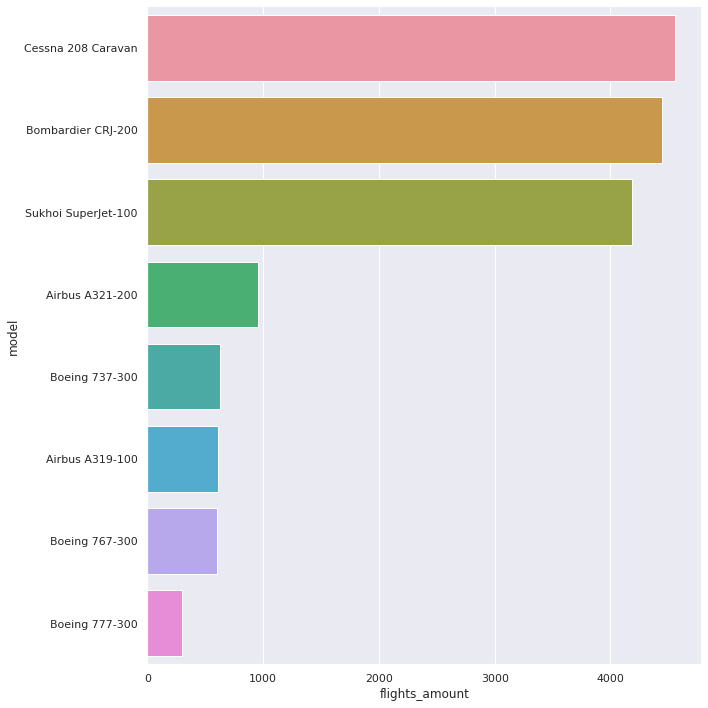

In [3]:
sns.catplot(y="model"
            ,x='flights_amount'
            ,kind="bar"
            , data=model_data.sort_values(by='flights_amount',ascending=False)
            , height=10
            , aspect=1
            , orient='h'
           )

Построим график средним ежедневным полетам в города. Москва - крупнейший авиаузел в России, далее с большим отставанием следует Санкт-Петербург, затем - Новосибрск. Внизу графика достаточно много городов c минимальным значением  в 1 полет в день. 

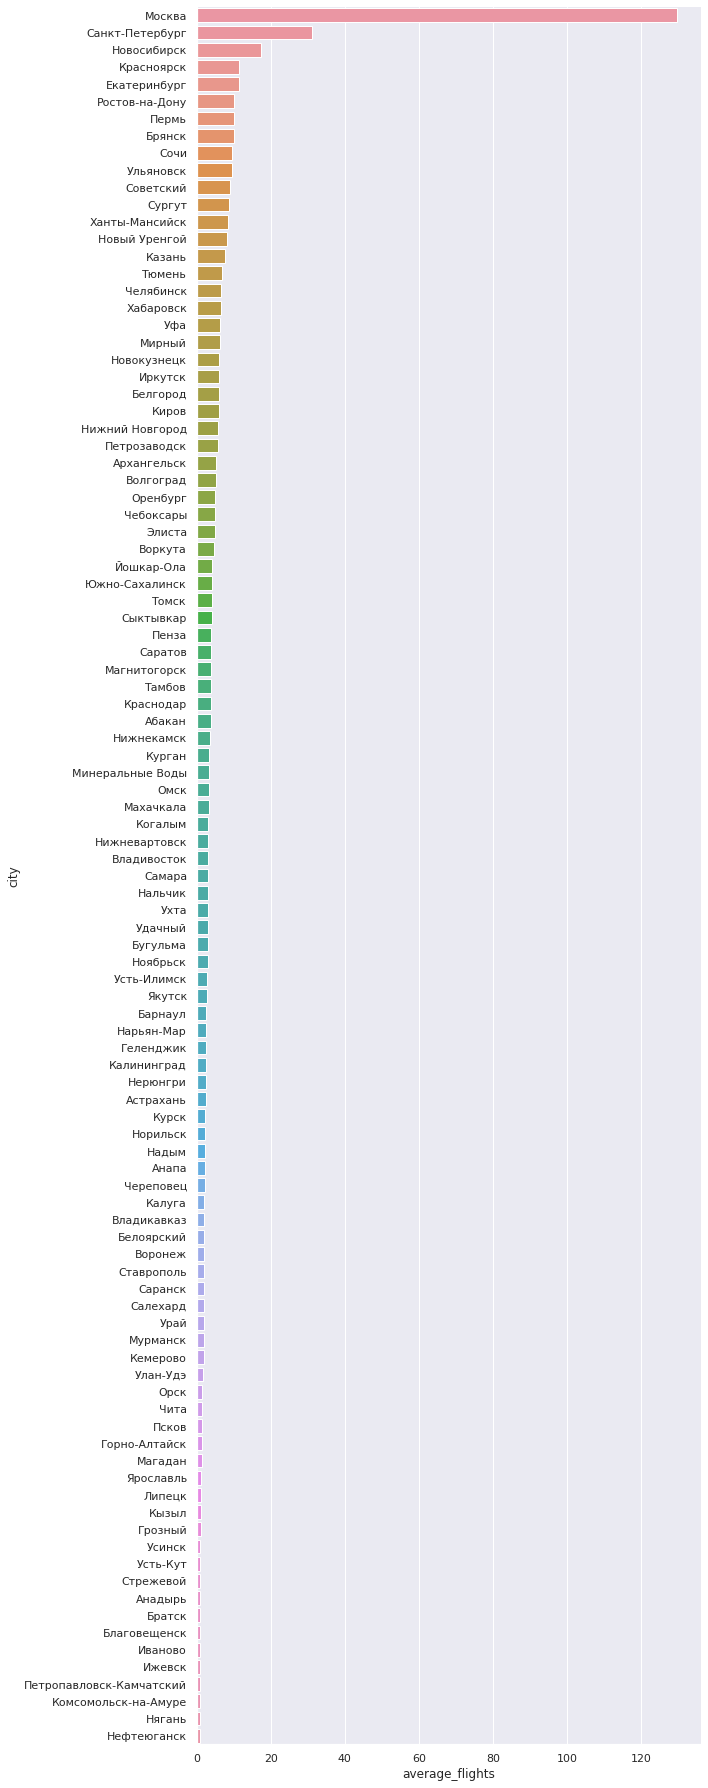

In [7]:
sns.catplot(y="city"
            ,x='average_flights'
            ,kind="bar"
            , data=city_data.sort_values(by='average_flights',ascending=False)
            , height=25
            , aspect=0.4
            , orient='h')


Рассмотрим ТОП-10 городов.

In [5]:
top10city=city_data.sort_values(by='average_flights',ascending=False).head(10)
top10city

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


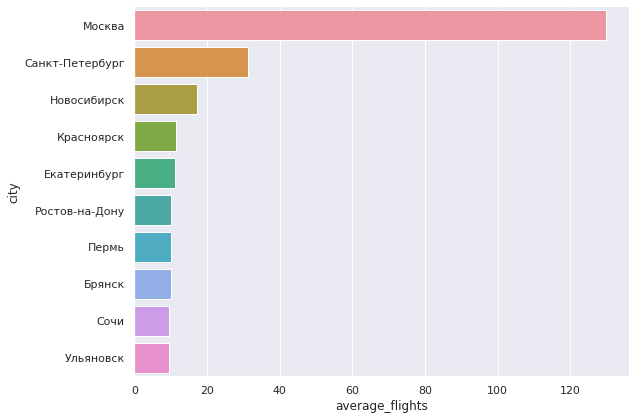

In [6]:
sns.catplot(y="city",x='average_flights',kind="bar", data=top10city, height=6, aspect=1.5, orient='h')

Следует отметить, что полётов в Москву более чем в 4 раза больше, чем полетов в Санкт-Петербург, полетов в Санкт-Петербург почти в 2 раза больше, чем в Новосибирск, полетов в Новосибирск в 1,5 раза больше, чем в Красноярск. Дальше разрыв между городами не такой заметный. Большинство городов в топ-10 - миллионники, но начиная с 8 места три города с населением менее 700 тысяч, причем самый маленький (Сочи) является туристическим направлением. 